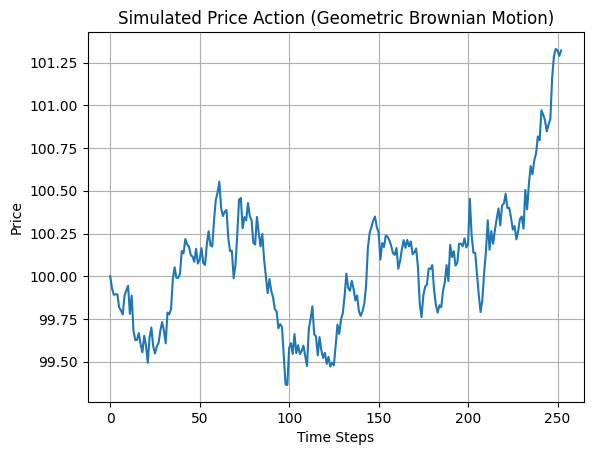

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulating Price Action via Geometric Brownian Motion 
def simulate_price_action(init_price, base_drift, sigma, time_in_years, time_steps):
    plt.close("all")
    dt = time_in_years/time_steps

    drift_variability = 0.02
    
    prices = [init_price]
    
    for _ in range(time_steps):
        drift = base_drift + np.random.normal(0, drift_variability * np.sqrt(dt))
        # Wiener process (random shock component)
        wiener_process = np.random.normal(scale=np.sqrt(dt))
        
        # GBM formula applied iteratively
        next_price = prices[-1] * np.exp((drift - 0.5 * sigma ** 2) * dt + sigma * wiener_process)
        
        prices.append(next_price)
    
    plt.plot(prices)
    plt.xlabel("Time Steps")
    plt.ylabel("Price")
    plt.title("Simulated Price Action (Geometric Brownian Motion)")
    plt.grid(True)
    plt.show()
    return prices

price_action = simulate_price_action(100, 0.035, 0.015, 1, 252)
    

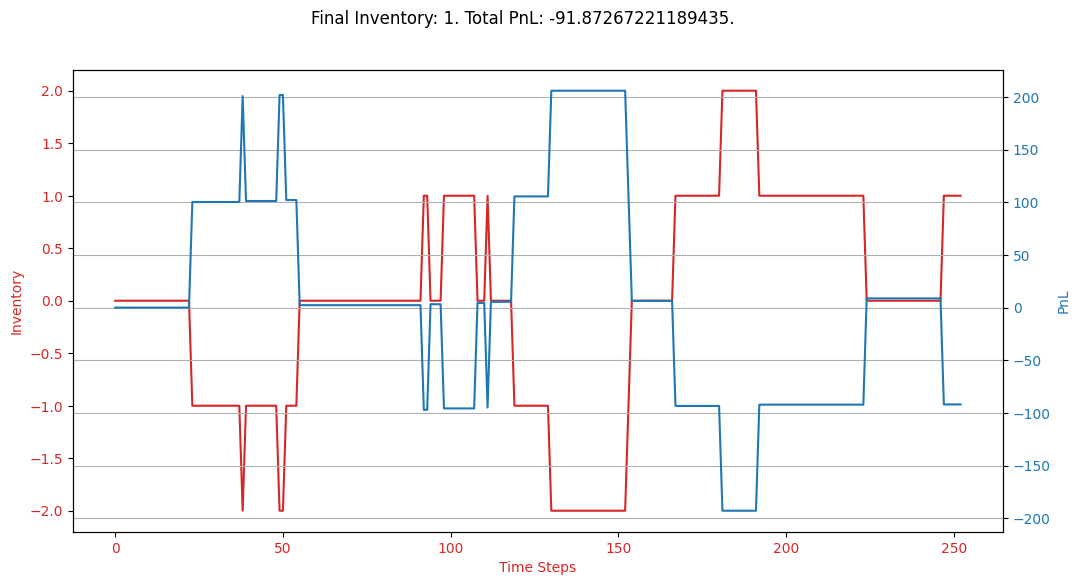

In [64]:
import numpy as np
import matplotlib.pyplot as plt

class MarketMaker:
    def __init__(self, spread, prices, trade_probability=0.05):
        self.spread = spread
        self.prices = prices
        self.trade_probability = trade_probability

    def stream_prices(self, price):
        bid = price * (1 - self.spread / 2)
        ask = price * (1 + self.spread / 2)
        return bid, ask

    def simulate_trading(self):
        # Initialize running totals
        inventory = 0
        pnl = 0
        inv_hist = []
        pnl_hist = []
        for price in self.prices:
            bid, ask = self.stream_prices(price)
            # Decide if a trade occurs
            if np.random.rand() < self.trade_probability:
                if np.random.choice(2) == 1:
                    # Client buys from MM
                    inventory -= 1
                    pnl += ask  # Selling at ask increases P&L
                else:
                    # Client sells to MM
                    inventory += 1
                    pnl -= bid  # Buying at bid decreases P&L
            inv_hist.append(inventory)
            pnl_hist.append(pnl)
        
        title = f'Final Inventory: {inventory}. Total PnL: {pnl}.'

        fig, ax1 = plt.subplots(figsize=(12,6))

        color = 'tab:red'
        ax1.plot(inv_hist, color=color)
        ax1.set_xlabel('Time Steps', color=color)
        ax1.set_ylabel('Inventory', color=color)
        ax1.tick_params(labelcolor=color)

        color = 'tab:blue'
        ax2 = ax1.twinx()
        ax2.plot(pnl_hist, color=color)
        ax2.set_ylabel('PnL', color=color)
        ax2.tick_params(labelcolor=color)

        fig.suptitle(title)
        plt.grid(True)
        plt.show()
        
            
    
    def generate_quotes(self):
        plt.close("all")
        bids, asks = [], []
        for price in self.prices:
            bid, ask = self.stream_prices(price)
            bids.append(bid)
            asks.append(ask)
        return bids, asks

    def plote_quotes(bids, asks):
        # Plotting bid and ask prices
        plt.plot(bids, label='Bid Prices')
        plt.plot(asks, label='Ask Prices')
        plt.xlabel("Time Steps")
        plt.ylabel("Bid/Ask Prices")
        plt.title("Market Maker Bid/Ask Quotes")
        plt.legend()
        plt.grid(True)
        plt.show()

mm = MarketMaker(0.01, price_action)
mm.simulate_trading()

0